# CIFAR-10 Image Classification using CNNs
This notebook demonstrates a complete ML pipeline for image classification using three CNN architectures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix

np.random.seed(42)
tf.random.set_seed(42)

2025-05-26 11:05:16.581868: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-26 11:05:16.604108: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 11:05:16.997309: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 11:05:17.126197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748257517.286159    4677 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748257517.35

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


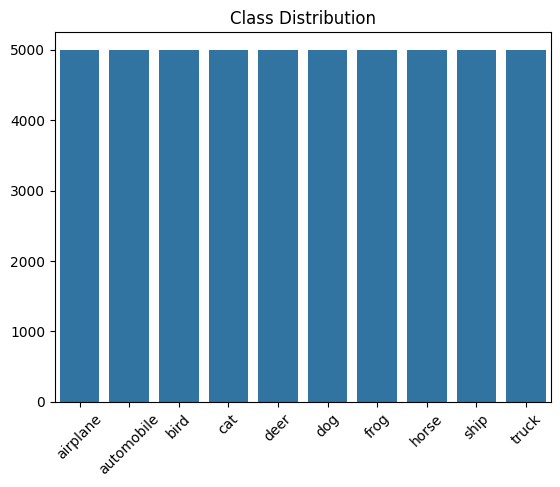

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

unique, counts = np.unique(y_train, return_counts=True)
sns.barplot(x=class_names, y=counts)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [4]:
def build_cnn_model_1():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def build_cnn_model_2():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def build_cnn_model_3():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [5]:
def compile_and_train(model, name):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(x_train, y_train, epochs=15, validation_split=0.2,
                        callbacks=[early_stop], verbose=2)
    model.save(f"{name}.h5")
    return model, history

models_histories = []
for i, model_fn in enumerate([build_cnn_model_1, build_cnn_model_2, build_cnn_model_3], start=1):
    print(f"Training Model {i}")
    model, history = compile_and_train(model_fn(), f"model_{i}")
    models_histories.append((model, history))

Training Model 1


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-26 11:05:55.251358: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
1250/1250 - 13s - 11ms/step - accuracy: 0.4597 - loss: 1.5152 - val_accuracy: 0.5581 - val_loss: 1.2731
Epoch 2/15
1250/1250 - 21s - 17ms/step - accuracy: 0.5738 - loss: 1.2140 - val_accuracy: 0.5956 - val_loss: 1.1711
Epoch 3/15
1250/1250 - 12s - 10ms/step - accuracy: 0.6171 - loss: 1.0999 - val_accuracy: 0.6074 - val_loss: 1.1341
Epoch 4/15
1250/1250 - 12s - 10ms/step - accuracy: 0.6447 - loss: 1.0217 - val_accuracy: 0.6173 - val_loss: 1.1137
Epoch 5/15
1250/1250 - 13s - 10ms/step - accuracy: 0.6675 - loss: 0.9609 - val_accuracy: 0.6244 - val_loss: 1.1028
Epoch 6/15
1250/1250 - 12s - 10ms/step - accuracy: 0.6849 - loss: 0.9086 - val_accuracy: 0.6284 - val_loss: 1.0939
Epoch 7/15
1250/1250 - 12s - 10ms/step - accuracy: 0.7010 - loss: 0.8630 - val_accuracy: 0.6268 - val_loss: 1.1137
Epoch 8/15
1250/1250 - 20s - 16ms/step - accuracy: 0.7157 - loss: 0.8195 - val_accuracy: 0.6234 - val_loss: 1.1405
Epoch 9/15
1250/1250 - 12s - 10ms/step - accuracy: 0.7301 - loss: 0.7766 - val_a

Training Model 2
Epoch 1/15
1250/1250 - 65s - 52ms/step - accuracy: 0.4961 - loss: 1.4054 - val_accuracy: 0.6109 - val_loss: 1.1232
Epoch 2/15
1250/1250 - 77s - 62ms/step - accuracy: 0.6399 - loss: 1.0280 - val_accuracy: 0.6490 - val_loss: 1.0084
Epoch 3/15
1250/1250 - 59s - 47ms/step - accuracy: 0.6945 - loss: 0.8745 - val_accuracy: 0.6534 - val_loss: 1.0005
Epoch 4/15
1250/1250 - 59s - 47ms/step - accuracy: 0.7361 - loss: 0.7588 - val_accuracy: 0.6651 - val_loss: 1.0026
Epoch 5/15
1250/1250 - 81s - 65ms/step - accuracy: 0.7716 - loss: 0.6562 - val_accuracy: 0.6625 - val_loss: 1.0395
Epoch 6/15
1250/1250 - 59s - 47ms/step - accuracy: 0.8007 - loss: 0.5667 - val_accuracy: 0.6597 - val_loss: 1.0857


Training Model 3
Epoch 1/15
1250/1250 - 77s - 62ms/step - accuracy: 0.4207 - loss: 1.5963 - val_accuracy: 0.5487 - val_loss: 1.2310
Epoch 2/15
1250/1250 - 81s - 65ms/step - accuracy: 0.5752 - loss: 1.1987 - val_accuracy: 0.5727 - val_loss: 1.2076
Epoch 3/15
1250/1250 - 81s - 65ms/step - accuracy: 0.6362 - loss: 1.0315 - val_accuracy: 0.6862 - val_loss: 0.8957
Epoch 4/15
1250/1250 - 73s - 58ms/step - accuracy: 0.6775 - loss: 0.9133 - val_accuracy: 0.6959 - val_loss: 0.8835
Epoch 5/15
1250/1250 - 73s - 59ms/step - accuracy: 0.7156 - loss: 0.8155 - val_accuracy: 0.7142 - val_loss: 0.8297
Epoch 6/15
1250/1250 - 82s - 66ms/step - accuracy: 0.7425 - loss: 0.7297 - val_accuracy: 0.7155 - val_loss: 0.8522
Epoch 7/15
1250/1250 - 83s - 66ms/step - accuracy: 0.7608 - loss: 0.6690 - val_accuracy: 0.7200 - val_loss: 0.8375
Epoch 8/15
1250/1250 - 81s - 65ms/step - accuracy: 0.7814 - loss: 0.6172 - val_accuracy: 0.7110 - val_loss: 0.9299


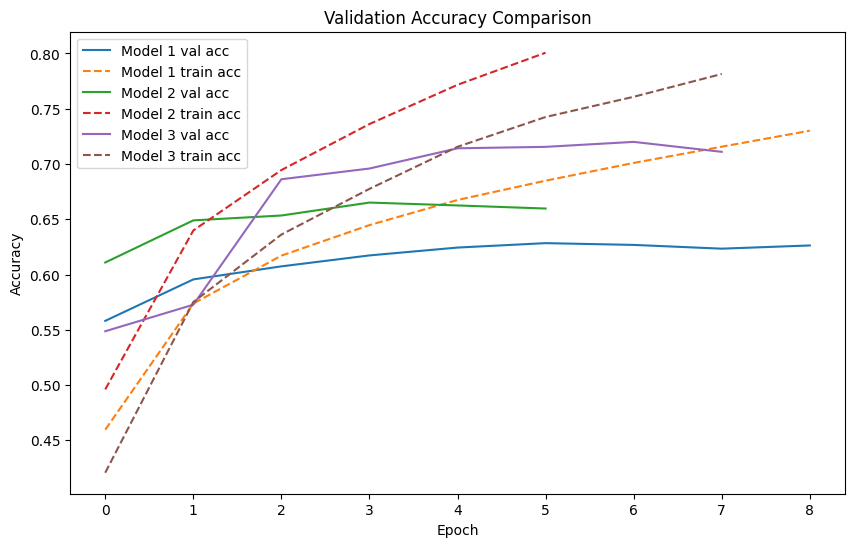

In [6]:
def plot_history(history, label):
    plt.plot(history.history['val_accuracy'], label=f'{label} val acc')
    plt.plot(history.history['accuracy'], linestyle='--', label=f'{label} train acc')

plt.figure(figsize=(10, 6))
for i, (_, history) in enumerate(models_histories):
    plot_history(history, f'Model {i+1}')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
test_accuracies = []
for i, (model, _) in enumerate(models_histories, start=1):
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_accuracies.append(test_acc)
    print(f"Model {i} Test Accuracy: {test_acc:.4f}")

best_index = np.argmax(test_accuracies)
best_model = models_histories[best_index][0]
print(f"Best Model: Model {best_index+1} with {test_accuracies[best_index]*100:.2f}% accuracy")

In [ ]:
y_pred = best_model.predict(x_test).argmax(axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test.flatten(), y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    pred_label = class_names[y_pred[i]]
    true_label = class_names[y_test[i][0]]
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()